# Amazon Reviews

## Apache Spark & PySpark

In [1]:
#Importing the pyspark API that operates within the Java Virtual Machine (JVM)
import pyspark
import numpy as np

In [3]:
#Importing the Spark session
from pyspark.sql import SparkSession

In [ ]:
#Starting Spark session to connect to the cluster to get ready to submit jobs and 
#connect to the master through standalone mode

spark = SparkSession.builder \
        .master('spark://localhost:7077') \
        .appName('Amazon_Reviews') \
        .getOrCreate()

In [7]:
#Checking if the correct address for the master has been connected 
print(spark.sparkContext.master)

spark://localhost:7077


In [9]:
#Opening the UI for Spark jobs
spark

Application connected to the Apache Spark cluster on standalone mode with the master on http://localhost:8080 and located on Spark://0.0.0.0:7077, the worker on http://localhost:8081, while the Spark jobs can be seen at http://localhost:4040/jobs

## Exploratory Data Analysis (EDA)

In [ ]:
#Importing the dataset that has been retrieved, making the header as False since the column names
#have not been added, and that values have been used as columns
dfspark = spark.read.csv('amazon_reviews.csv', 
                         inferSchema = True, header = False)

In [264]:
#Checking the tentative columns
dfspark.columns

['_c0', '_c1', '_c2']

In [19]:
#Checking how it looks within the dataframe 
dfspark.show(20)

+---+--------------------+--------------------+
|_c0|                 _c1|                 _c2|
+---+--------------------+--------------------+
|  2|Stuning even for ...|This sound track ...|
|  2|The best soundtra...|I'm reading a lot...|
|  2|            Amazing!|"This soundtrack ...|
|  2|Excellent Soundtrack|I truly like this...|
|  2|Remember, Pull Yo...|If you've played ...|
|  2|an absolute maste...|I am quite sure a...|
|  1|        Buyer beware|"This is a self-p...|
|  2|      Glorious story|I loved Whisper o...|
|  2|    A FIVE STAR BOOK|I just finished r...|
|  2|Whispers of the W...|This was a easy t...|
|  1|          The Worst!|A complete waste ...|
|  2|          Great book|This was a great ...|
|  2|          Great Read|I thought this bo...|
|  1|           Oh please|I guess you have ...|
|  1|Awful beyond belief!|"I feel I have to...|
|  1|Don't try to fool...|It's glaringly ob...|
|  2|A romantic zen ba...|"When you hear fo...|
|  2|Fashionable Compr...|After I had a 

In [13]:
from pyspark.sql.functions import col

In [15]:
#Renaming the tentative columns to suitable names
dfspark = dfspark.withColumnRenamed('_c0','polarity') \
                .withColumnRenamed('_c1','review_header') \
                .withColumnRenamed('_c2', 'review_text')

In [25]:
#Showing the dataframe to look through again after changes
dfspark.show(20)

+--------+--------------------+--------------------+
|polarity|       review_header|         review_text|
+--------+--------------------+--------------------+
|       2|Stuning even for ...|This sound track ...|
|       2|The best soundtra...|I'm reading a lot...|
|       2|            Amazing!|"This soundtrack ...|
|       2|Excellent Soundtrack|I truly like this...|
|       2|Remember, Pull Yo...|If you've played ...|
|       2|an absolute maste...|I am quite sure a...|
|       1|        Buyer beware|"This is a self-p...|
|       2|      Glorious story|I loved Whisper o...|
|       2|    A FIVE STAR BOOK|I just finished r...|
|       2|Whispers of the W...|This was a easy t...|
|       1|          The Worst!|A complete waste ...|
|       2|          Great book|This was a great ...|
|       2|          Great Read|I thought this bo...|
|       1|           Oh please|I guess you have ...|
|       1|Awful beyond belief!|"I feel I have to...|
|       1|Don't try to fool...|It's glaringly 

In [270]:
#Checking the new added columns
dfspark.columns

['polarity', 'review_header', 'review_text']

In [29]:
#Checking the schema and the datatypes
dfspark.printSchema()

root
 |-- polarity: integer (nullable = true)
 |-- review_header: string (nullable = true)
 |-- review_text: string (nullable = true)



In [31]:
dfspark.dtypes

[('polarity', 'int'), ('review_header', 'string'), ('review_text', 'string')]

In [33]:
#Checking the total number of rows that is within the dataset
dfspark.count()

3600000

In [37]:
from pyspark.sql.functions import when, count, isnan, col

In [41]:
#Checking how many rows there are in each of the sentiments (polarity),
#and whether the data is balanced of 1.8 million rows in each sentiment/polarity
dfspark.groupBy('polarity').count().show()

+--------+-------+
|polarity|  count|
+--------+-------+
|       1|1800000|
|       2|1800000|
+--------+-------+



In [43]:
#Checking the mean value of the polarity by grouping it, also checking if there are polarity that
#has 0 or not, or if it is only 1 and 2
dfspark.groupBy('polarity').mean().show()

+--------+-------------+
|polarity|avg(polarity)|
+--------+-------------+
|       1|          1.0|
|       2|          2.0|
+--------+-------------+



In [ ]:
#Looking throuh the dataframe filtering based on the positive group of reviews (polarity 2)
#and negative group of reviews (polarity 1)

In [45]:
dfspark.filter(col('polarity').isin([1])).show(5)

+--------+--------------------+--------------------+
|polarity|       review_header|         review_text|
+--------+--------------------+--------------------+
|       1|        Buyer beware|"This is a self-p...|
|       1|          The Worst!|A complete waste ...|
|       1|           Oh please|I guess you have ...|
|       1|Awful beyond belief!|"I feel I have to...|
|       1|Don't try to fool...|It's glaringly ob...|
+--------+--------------------+--------------------+
only showing top 5 rows



In [47]:
dfspark.filter(col('polarity').isin([2])).show(5)

+--------+--------------------+--------------------+
|polarity|       review_header|         review_text|
+--------+--------------------+--------------------+
|       2|Stuning even for ...|This sound track ...|
|       2|The best soundtra...|I'm reading a lot...|
|       2|            Amazing!|"This soundtrack ...|
|       2|Excellent Soundtrack|I truly like this...|
|       2|Remember, Pull Yo...|If you've played ...|
+--------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
#Checking the rows by descending order for an overview

In [49]:
dfspark.orderBy(dfspark['polarity'].desc()).show(5)

+--------+--------------------+--------------------+
|polarity|       review_header|         review_text|
+--------+--------------------+--------------------+
|       2|I GIVE IT A 4 sta...|I think this was ...|
|       2|secrets of the ic...|Excellent! Someon...|
|       2|Stuning even for ...|This sound track ...|
|       2|    All the big ones|"For my sometimes...|
|       2|An excellent cros...|This historiograp...|
+--------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
#Checking the rows by ascending order for an overview

In [51]:
dfspark.orderBy('polarity').show(5)

+--------+--------------------+--------------------+
|polarity|       review_header|         review_text|
+--------+--------------------+--------------------+
|       1|Pike takes anothe...|I've been reading...|
|       1|this doll is no l...|The doll is adora...|
|       1|From a Parent: No...|"I read this book...|
|       1|"Gives new meanin...|"This novel despe...|
|       1|        Buyer beware|"This is a self-p...|
+--------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
#Importing length to see how many characters of the length of each row of review

In [17]:
from pyspark.sql.functions import length

In [19]:
length_text = dfspark.select('review_text', length(col('review_text')).alias('length_text'))

In [57]:
length_text.show(10)

+--------------------+-----------+
|         review_text|length_text|
+--------------------+-----------+
|This sound track ...|        394|
|I'm reading a lot...|        470|
|"This soundtrack ...|        370|
|I truly like this...|        721|
|If you've played ...|        425|
|I am quite sure a...|        800|
|"This is a self-p...|        631|
|I loved Whisper o...|        506|
|I just finished r...|        506|
|This was a easy t...|        270|
+--------------------+-----------+
only showing top 10 rows



In [ ]:
#Joining the length_text dataframe to the initial dfspark dataframe

In [21]:
dfspark = dfspark.join(length_text, on = 'review_text', how = 'inner')

In [61]:
#Checking whether changes have been saved
dfspark.show(5)

+--------------------+--------+--------------------+-----------+
|         review_text|polarity|       review_header|length_text|
+--------------------+--------+--------------------+-----------+
| ""Monster Truck ...|       1|"""The Sound of a...|         25|
|               ""P""|       1|              """C""|          6|
| ""THELI"" OR ""D...|       1|"LISTEN TO THERIO...|         26|
|       ""Tom Swift""|       2|"Brilliant satire...|         14|
|           ""cute"""|       1|"Too, too ""cute"...|         10|
+--------------------+--------+--------------------+-----------+
only showing top 5 rows



In [23]:
#Customizing the order for suitable order
dfspark = dfspark.select('polarity', 'review_header', 'review_text', 'length_text')

In [65]:
dfspark.show(5)

+--------+--------------------+--------------------+-----------+
|polarity|       review_header|         review_text|length_text|
+--------+--------------------+--------------------+-----------+
|       1|"""The Sound of a...| ""Monster Truck ...|         25|
|       1|              """C""|               ""P""|          6|
|       1|"LISTEN TO THERIO...| ""THELI"" OR ""D...|         26|
|       2|"Brilliant satire...|       ""Tom Swift""|         14|
|       1|"Too, too ""cute"...|           ""cute"""|         10|
+--------+--------------------+--------------------+-----------+
only showing top 5 rows



In [67]:
#Checking how many unique review headers there are
dfspark.select('review_header').distinct().count()

2628671

In [69]:
from pyspark.sql.functions import avg

In [ ]:
#Looking through the average value of the length for the reviews

In [71]:
dfspark.select(avg(length('review_text')).alias('avg_len_of_review_text')).show()

+----------------------+
|avg_len_of_review_text|
+----------------------+
|    362.93414238135233|
+----------------------+



In [73]:
#Checking how many rows that has 362 characters as length of review text since it was average
dfspark.where(length('review_text') == 362).count()

5460

In [59]:
#Dropping the review header and length text before transforming and train test splitting
#since they are not needed and review header is not unique where there are a lot of values in it
dfspark = dfspark.drop('review_header', 'length_text')

In [77]:
#Preparing the text mining process
dfspark.show(n = 5, truncate = False)

+--------+--------------------------+
|polarity|review_text               |
+--------+--------------------------+
|1       | ""Monster Truck Tunes""" |
|1       | ""P""                    |
|1       | ""THELI"" OR ""DEGGIAL"""|
|2       | ""Tom Swift""            |
|1       | ""cute"""                |
+--------+--------------------------+
only showing top 5 rows



## Transforming features

In [25]:
from pyspark.sql.functions import lower, when, regexp_replace, trim

In [83]:
#Turning 2 (positive) into (1), and 1 (negative) into 0
#Trimming by removing extra type of whitespaces in both of the beginning and the end 
#of the review text, while also removing regular and useless expressions such as hashtags, 
#urls, special characters

In [27]:
dfspark = dfspark.withColumn('label', when(col('polarity') == 2, 1).otherwise(0)) \
                 .withColumn('review_text', trim(col('review_text'))) \
                 .withColumn('review_text', lower(regexp_replace(col('review_text'), \
            r'@\w+|https?://\s+|http\w+\s|#\w+|\d+|\(.*?!\)|[?+.\->]|[^a-zA-Z0-9\s]|(\w+)!', '')))

In [81]:
#Polarity 1 (negative) is being assigned label 0, and polarity 2 (positive) is assigned label 1

In [83]:
dfspark.show(5)

+--------+-------------------+-----+
|polarity|        review_text|label|
+--------+-------------------+-----+
|       1|monster truck tunes|    0|
|       1|                  p|    0|
|       1|   theli or deggial|    0|
|       2|          tom swift|    1|
|       1|               cute|    0|
+--------+-------------------+-----+
only showing top 5 rows



In [ ]:
#Dropping polarity since label is now in the dataframe with the new assigned values

In [61]:
dfspark = dfspark.drop('polarity')

In [192]:
dfspark.show(5)

+-------------------+-----+
|        review_text|label|
+-------------------+-----+
|monster truck tunes|    0|
|                  p|    0|
|   theli or deggial|    0|
|          tom swift|    1|
|               cute|    0|
+-------------------+-----+
only showing top 5 rows



In [77]:
#Converting to Pandas for TensorFlow to understand, since TensorFlow is expecting dataframes 
#within Pandas, or also arrays that works in-memory such as NumPy
#A sample of 20% is taken since the data is too large for Pandas to handle the whole data for
#processing compared to how PySpark can handle it. 

In [31]:
df_pandas = dfspark.select('label', 'review_text').sample(False, 0.2).toPandas()

In [289]:
df_pandas.head(10)

,label,review_text
0,1,bill keim
1,0,inc
2,1,md is better than bond
3,1,monkey
4,1,an intriguing depraved narrative
5,0,bad quality of plastic
6,1,but goodie
7,0,for dumb ass design
8,1,good storyline
9,1,howto manual for aspiring pond builders


In [93]:
#Importing WordCloud to visualize the most common words for each sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [83]:
#Visualizing the positive type of sentiment where label 0 is negative, and label 1 is positive

In [96]:
#Positive reviews of words

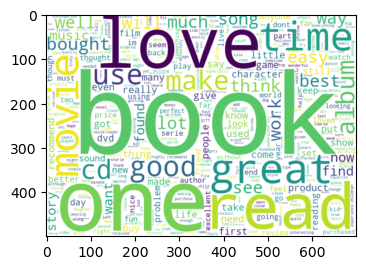

In [95]:
plt.figure(figsize = (4,3))
review_positive = ' '.join(df_pandas[df_pandas['label'] == 1]['review_text'])
wcl = WordCloud(max_words = 400, background_color = 'white', width = 700, height = 500).generate(review_positive)
plt.imshow(wcl, interpolation = 'bilinear')
plt.show()

In [ ]:
#Negative reviews of words

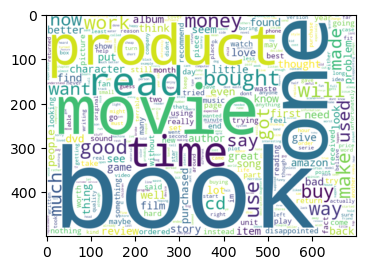

In [97]:
plt.figure(figsize = (4,3))
review_negative = ' '.join(df_pandas[df_pandas['label'] == 0]['review_text'])
wcl = WordCloud(max_words = 400, background_color = 'white', width = 700, height = 500).generate(review_negative)
plt.imshow(wcl, interpolation = 'bilinear')
plt.show()

From the visualizations, the words from the positive reviews were such as well, easy, fun, good, great, recommend, buy, best, and the words from the negative reviews were such as better, want, nothing, disappointed, bad, waste, problem.

## Pre-processing for SparkMLlib

In [ ]:
#Continues with the pre-processing for the traditional Machine Learning models in Spark MLlib
#where tokenization, removing stopwords, converting text with countvectorizer, and lastly IDF

In [63]:
from pyspark.ml.feature import Tokenizer

In [65]:
tokenized = Tokenizer(inputCol = "review_text", outputCol = "review_tkn")

In [67]:
from pyspark.ml.feature import StopWordsRemover

In [69]:
stopw = StopWordsRemover(inputCol = "review_tkn", outputCol = "review_stopw")

In [71]:
from pyspark.ml.feature import CountVectorizer

In [73]:
cove = CountVectorizer(inputCol = "review_stopw", outputCol = "review_cove", vocabSize = 10000, minDF = 5)

In [75]:
from pyspark.ml.feature import IDF

In [77]:
idf = IDF(inputCol = "review_cove", outputCol = "features")

## Initializing the model and building the pipeline

In [79]:
from pyspark.ml import Pipeline

In [53]:
#Importing the algorithm that will be used for modeling and put in the pipeline

In [81]:
from pyspark.ml.classification import NaiveBayes

In [83]:
dfspark.columns

['review_text', 'label']

### Naive Bayes

In [85]:
nbc = NaiveBayes(featuresCol = 'features', labelCol = 'label')

In [87]:
pipeline_nbc = Pipeline(stages=[tokenized, stopw, cove, idf, nbc])

## Train test splitting the data

In [89]:
train_df, test_df = dfspark.randomSplit([0.7, 0.3], seed = 30)

## Building the models for training

### Naive Bayes

In [91]:
nbc_model = pipeline_nbc.fit(train_df)

In [93]:
nbc_pred = nbc_model.transform(test_df)

# Performance evaluation of model

In [ ]:
#Evaluating to see how each model performed within the traditional machine learning algorithms

In [95]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [97]:
eval = MulticlassClassificationEvaluator(metricName = 'accuracy', labelCol = 'label', 
                                         predictionCol = 'prediction')

In [99]:
accuracy_nbc = eval.evaluate(nbc_pred)

In [101]:
print('Accuracy score: ')
print(f'Naive Bayes: {accuracy_nbc}')

Accuracy score: 
Naive Bayes: 0.8021822918492469


## Pre-processing before building the CNN model

In [103]:
df_pandas.head(5)

,label,review_text
0,0,inc
1,0,mr ondaatje
2,1,stars
3,0,at least in lahayes view
4,1,beautiful arrangement of


In [91]:
#Importing necessary libraries such as the tokenizer for pre process the data before 
#building and training the CNN model

In [105]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [107]:
X_CNN = df_pandas['review_text']
y_CNN = df_pandas['label']

In [109]:
#Stating the vocabulary size, and thereafter converting words
voc_size = 10000
tokenizer = Tokenizer(num_words = voc_size)

In [111]:
tokenizer.fit_on_texts(X_CNN)

In [ ]:
#Getting the strings of text converted to sequences 

In [113]:
sqncs = tokenizer.texts_to_sequences(X_CNN)

In [115]:
max_len = 50
X_pad = pad_sequences(sqncs, maxlen = max_len, padding = 'post')

In [ ]:
#Train test splitting the data before building the CNN model

In [117]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_CNN, train_size = 0.7, random_state = 32)

## Building a CNN model with TensorFlow

In [ ]:
#Importing all essential and needed libraries for training a CNN model with necessary layers
#in conjunction with having large weights and not overfitting the neural network.

In [193]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

In [195]:
embedding_dim = 300

In [197]:
convNN = Sequential()

In [199]:
convNN.add(Embedding(input_dim = voc_size,
                       input_length = max_len,
                       output_dim = embedding_dim))
convNN.add(Conv1D(filters = 64, activation = 'relu', kernel_regularizer = l2(0.01), kernel_size = 3))
convNN.add(BatchNormalization())
convNN.add(Conv1D(filters = 32, activation = 'relu', kernel_regularizer = l2(0.01), kernel_size = 3))
convNN.add(BatchNormalization())
convNN.add(GlobalMaxPooling1D())
convNN.add(Dropout(0.5))
convNN.add(Dense(64, activation = 'relu', kernel_regularizer = l2(0.01)))
convNN.add(Dense(1, activation = 'sigmoid'))

In [201]:
convNN.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [203]:
convNN.fit(X_train, y_train, batch_size = 64, epochs = 5)

Epoch 1/5
7904/7904 ━━━━━━━━━━━━━━━━━━━━ 456s 57ms/step - accuracy: 0.7683 - loss: 0.7738
Epoch 2/5
7904/7904 ━━━━━━━━━━━━━━━━━━━━ 508s 64ms/step - accuracy: 0.8484 - loss: 0.3794
Epoch 3/5
7904/7904 ━━━━━━━━━━━━━━━━━━━━ 462s 58ms/step - accuracy: 0.8570 - loss: 0.3612
Epoch 4/5
7904/7904 ━━━━━━━━━━━━━━━━━━━━ 450s 57ms/step - accuracy: 0.8639 - loss: 0.3471
Epoch 5/5
7904/7904 ━━━━━━━━━━━━━━━━━━━━ 464s 59ms/step - accuracy: 0.8680 - loss: 0.3390


In [206]:
convNN.evaluate(X_test, y_test)

6775/6775 ━━━━━━━━━━━━━━━━━━━━ 69s 10ms/step - accuracy: 0.8624 - loss: 0.3492


[0.34868067502975464, 0.8628503084182739]

In [208]:
y_pred_convNN = convNN.predict(X_test)

6775/6775 ━━━━━━━━━━━━━━━━━━━━ 75s 11ms/step


## Results comparison between CNN & ML model

In [210]:
from sklearn.metrics import accuracy_score

In [ ]:
#Threshold of 0.5 is attached and getting it converted to labels

In [212]:
y_pred_convNN = (y_pred_convNN > 0.5).astype(int)

In [224]:
#Models built on Spark MLlib and TensorFlow compared to see which model taht performed best

In [226]:
def accuracy_evaluation():
    print('Accuracy score: ')
    print('======================================')
    print(f'Naive Bayes (Machine Learning): {accuracy_nbc}')
    print('======================================')
    print(f'CNN (Deep Learning): {accuracy_score(y_test, y_pred_convNN)}')
    print('======================================')
    
accuracy_evaluation()

Accuracy score: 
Naive Bayes (Machine Learning): 0.8021822918492469
CNN (Deep Learning): 0.8628502894572964


### Saving the best performed model

In [218]:
convNN.save('review_model.h5')

In [220]:
spark.stop()